In [15]:
import numpy as np 
import pandas as pd 
from _collections_abc import Callable 
from RungeKutta import RungeKutta

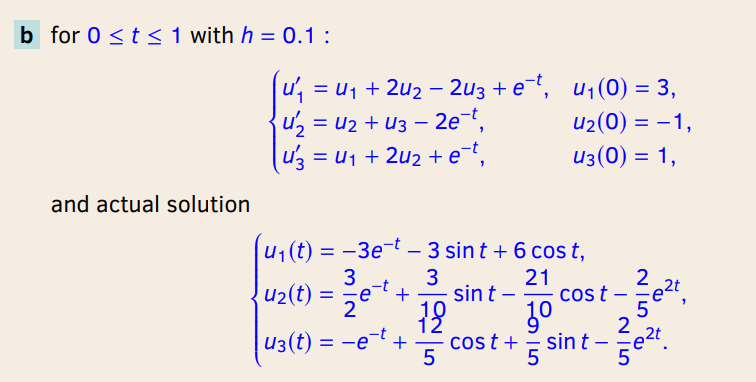

In [16]:
def LinearShooting(p:Callable[[np.ndarray,np.ndarray],np.ndarray],
                   q:Callable[[np.ndarray,np.ndarray],np.ndarray],
                   r:Callable[[np.ndarray,np.ndarray],np.ndarray],
                   t_span:np.ndarray,
                   y_init:np.ndarray,
                   n:np.float64)->pd.DataFrame:
    
    def f1(t:np.float64,y:np.ndarray)->np.ndarray:
        return np.array(object=[y[1],p(t)*y[1] + q(t)*y[0] + r(t)],dtype=np.float64) 
    
    def f2(t:np.float64,y:np.ndarray)->np.ndarray:
        return np.array(object=[y[1],p(t)*y[1] + q(t)*y[0] + r(t)],dtype=np.float64) 
    
    y_init1 = np.array(object=[y_init[0],0.],dtype=np.float64)
    y_init2 = np.array(object=[0,1],dtype=np.float64)
    
    df1 = RungeKutta(f=f1,t_span=t_span,y_init=y_init1,n=n)
    df2 = RungeKutta(f=f2,t_span=t_span,y_init=y_init2,n=n)
    
    t = df1.loc[:,'t']
    y1 = df1.loc[:,'y1']
    y2 = df2.loc[:,'y2']
    
    fac = (y_init[1] - y1[n])/y2[n]
    y = y1 + fac*y2 
    df = pd.DataFrame(data={'t':t,'y1':y1,'y2':y2,'y':y})
    
    return df 


if __name__ == '__main__':
    
    def f(t:np.float64,y:np.ndarray)->np.ndarray:
        f1 = y[0] + 2*y[1] - 2*y[2] + np.exp(-t)
        
        f2 = y[1] + y[2] - 2*np.exp(-t)
        
        f3 = y[0] + 2*y[1] + np.exp(-t)
        
        return np.array(object=[f1,f2,f3],dtype=np.float64)
    
    t_span = np.array(object=[0,1],dtype=np.float64)
    y_init = np.array(object=[3,-1,1],dtype=np.float64)
    
    n = 10 
    
    df = RungeKutta(f=f,t_span=t_span,y_init=y_init,n=n)
    print(df)
    
# t = np.linspace(start=0,stop=1,num=11)
# ara = y(t)
       

      t        y1        y2        y3
0   0.0  3.000000 -1.000000  1.000000
1   0.1  2.956013 -1.190863  1.174312
2   0.2  2.828200 -1.367171  1.294305
3   0.3  2.623005 -1.535167  1.355081
4   0.4  2.347153 -1.702133  1.350968
5   0.5  2.007630 -1.876603  1.275330
6   0.6  1.611655 -2.068628  1.120317
7   0.7  1.166649 -2.290085  0.876569
8   0.8  0.680190 -2.555068  0.532825
9   0.9  0.159976 -2.880347  0.075466
10  1.0 -0.386230 -3.285941 -0.512070


In [ ]:
if __name__ == '__main__':
    def p(t:np.ndarray)->np.ndarray:
        return np.full_like(a=t,fill_value= -3,dtype=np.float64)
    
    def q(t:np.ndarray)->np.ndarray:
        return np.full_like(a=t,fill_value=2,dtype=np.float64)
    
    def r(t:np.ndarray)->np.ndarray:
        return 2*t + 3 
    
    t_span = np.arrray(object=[])

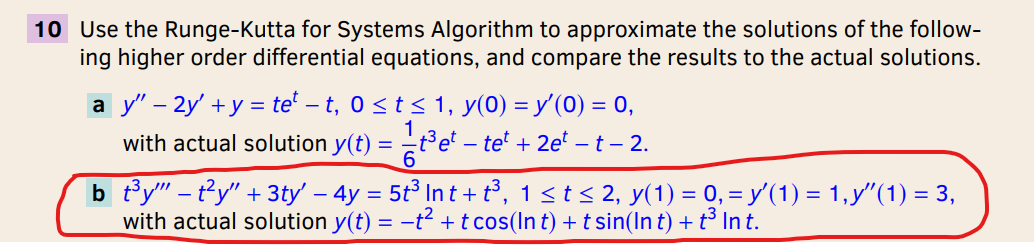

In [ ]:
import RungeKutta 
if __name__ == '__main__':

    def f(t:np.float64,y:np.ndarray)->np.ndarray:
        f1 = y[1]
        f2 = y[2]
        f3 = y[2]/t - 3*y[1]/t**2 + 4*y[0]/t**3 + 5*np.log(t)+1
        return np.array(object=[f1,f2,f3],dtype=np.float64)

    t_span= np.array(object=[1,2],dtype=np.float64)
    y_init = np.array(object=[0,1,3],dtype=np.float64)

    n = 10 
    df = RungeKutta(f=f,t_span=t_span,y_init=y_init,n=n)
    print(df)

    def y(t:np.float64)->np.float64:
        return -t**2 + t*np.cos(np.log(t)) + t*np.sin(np.log(t)) + t**3 * np.log(t)

    t = np.linspace(start=1,stop=2,num=n+1,dtype=np.float64)
    ar = y(t=t)
    df_exact = pd.DataFrame(data={'t':t,'y':ar})
    print(df_exact)